CLASE-VISUALIZADOR


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

class Visualizador:
    def __init__(self, datos):
        self.datos = datos


   #SCATTER
    def scatter(self):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.datos, x="Expected Goals (xG)", y="Goals")
        plt.title("Relación entre xG y Goals", fontsize=16)
        plt.xlabel("Expected Goals (xG)", fontsize=13)
        plt.ylabel("Goals", fontsize=13)
        plt.grid(alpha=0.3)


        corr = self.datos["Expected Goals (xG)"].corr(self.datos["Goals"])
        max_x = self.datos["Expected Goals (xG)"].max()
        min_x = self.datos["Expected Goals (xG)"].min()
        media_x = self.datos["Expected Goals (xG)"].mean()


        datos_texto = (
            f"Correlación: {corr:.3f}\n"
            f"Máx xG: {max_x:.2f}\n"
            f"Mín xG: {min_x:.2f}\n"
            f"Media xG: {media_x:.2f}\n"
        )

        # Mini-historia
        historia = (
            "Mini-historia:\n"
            "Correlación moderada-alta (0.61).\n"
            "Los puntos alejados de la línea representan\n"
            "equipos/jugadores sobre o bajo-performing."
        )


        texto_completo = datos_texto + historia

        plt.text(
            1.02, 0.95,
            texto_completo,
            transform=plt.gca().transAxes,
            fontsize=9,
            ha="left",
            va="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.92, pad=0.6)
        )

        plt.tight_layout()
        plt.show()

    #   HISTOGRAMA
    def histograma(self):
        plt.figure(figsize=(8, 5))
        sns.histplot(self.datos["Goals"], bins=20, kde=True)
        plt.title("Histograma de Goals", fontsize=16)
        plt.xlabel("Goals", fontsize=13)
        plt.ylabel("Frecuencia", fontsize=13)
        plt.grid(alpha=0.3)

        maximo = self.datos["Goals"].max()
        minimo = self.datos["Goals"].min()
        mediana = self.datos["Goals"].median()

        datos_texto = (
            f"Máximo: {maximo:.2f}\n"
            f"Mediana: {mediana:.2f}\n"
            f"Mínimo: {minimo:.2f}\n"
        )

        # Mini historia
        historia = (
            "Mini-historia:\n"
            "La mayoría de observaciones tienen 0 goles.\n"
            "Media de 0.09 indica eventos de gol poco frecuentes."
        )

        texto_completo = datos_texto + historia


        plt.text(
            1.02, 0.95,
            texto_completo,
            transform=plt.gca().transAxes,
            fontsize=8.8,
            ha="left",
            va="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.92, pad=0.6)
        )

        plt.tight_layout()
        plt.show()

    #CORRELACIONES
    def correlaciones(self):
        corr1 = self.datos["Goals"].corr(self.datos["Expected Goals (xG)"])
        corr2 = self.datos["Assists"].corr(self.datos["Progressive Passes"])
        corr3 = self.datos["Successful Dribbles"].corr(self.datos["Progressive Carries"])

        corr_df = pd.DataFrame({
            "Relacion": ["Goals_vs_xG", "Assists_vs_ProgPasses", "Dribbles_vs_Carries"],
            "Correlacion": [corr1, corr2, corr3]
        })

        plt.figure(figsize=(7, 6))
        sns.barplot(data=corr_df, x="Correlacion", y="Relacion")
        plt.title("Correlaciones seleccionadas", fontsize=18)
        plt.xlabel("Valor de correlación", fontsize=14)
        plt.ylabel("", fontsize=14)
        plt.grid(alpha=0.3)

        texto = (
            "Correlación:\n"
            f"Goals vs xG: {corr1:.2f}\n"
            f"Assists vs ProgPasses: {corr2:.2f}\n"
            f"Dribbles vs Carries: {corr3:.2f}\n\n"
            "Mini-historia:\n"
            "Variables predictoras de Goals:\n"
            "xG es el mejor indicador, assists aporta poco"
        )

        plt.text(
            1.02, 0.90,
            texto,
            transform=plt.gca().transAxes,
            fontsize=8,
            ha="left",
            va="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.90, pad=0.6)
        )

        plt.tight_layout()
        plt.show()

    #HEATMAP
    def heatmap(self):
        corr_goals_xg = self.datos["Goals"].corr(self.datos["Expected Goals (xG)"])
        corr_assists_prog = self.datos["Assists"].corr(self.datos["Progressive Passes"])
        corr_dribbles_carries = self.datos["Successful Dribbles"].corr(self.datos["Progressive Carries"])

        heatmap_df = pd.DataFrame({
            "Goals vs xG": [corr_goals_xg],
            "Assists vs ProgPasses": [corr_assists_prog],
            "Dribbles vs Carries": [corr_dribbles_carries]
        })

        plt.figure(figsize=(8, 3.5))
        sns.heatmap(
            heatmap_df,
            annot=True,
            cmap="coolwarm",
            vmin=-1, vmax=1,
            annot_kws={"size": 8}
        )
        plt.title("Heatmap de correlaciones", fontsize=14)

        plt.text(
            0.0, -0.35,
            "Mini-historia:\n"
            "Dribbles y Carries están moderadamente relacionados (0.46).\n"
            "Assists–ProgPasses es sorprendentemente débil (0.13).",
            transform=plt.gca().transAxes,
            fontsize=8,
            ha="left",
            va="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
        )
        plt.tight_layout()
        plt.show()


PRUEBAS_DE_LA_CLASE


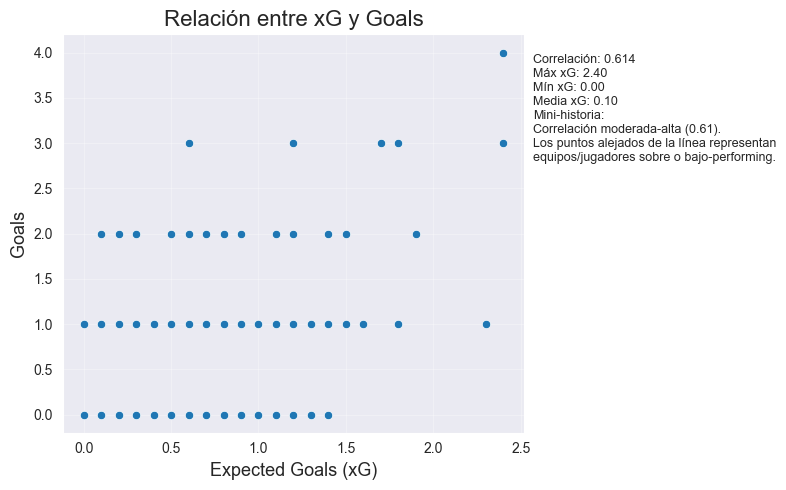

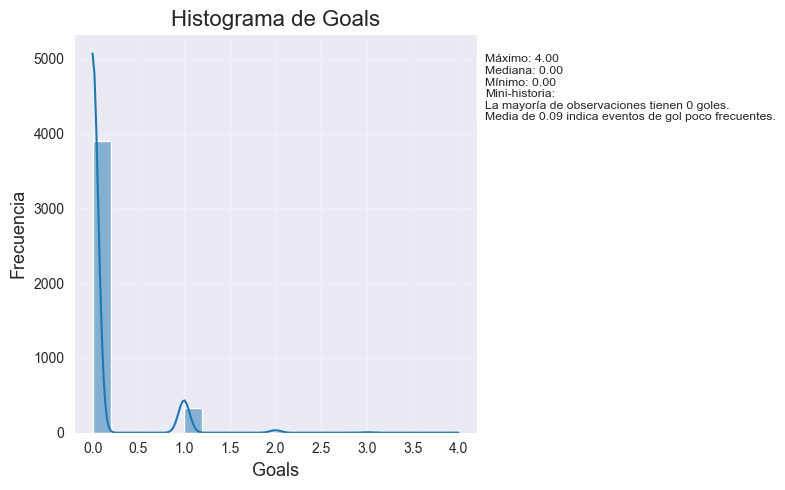

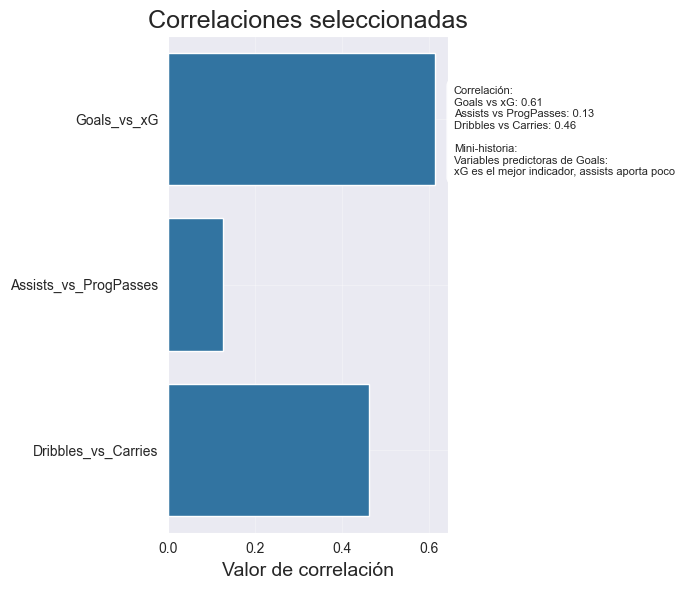

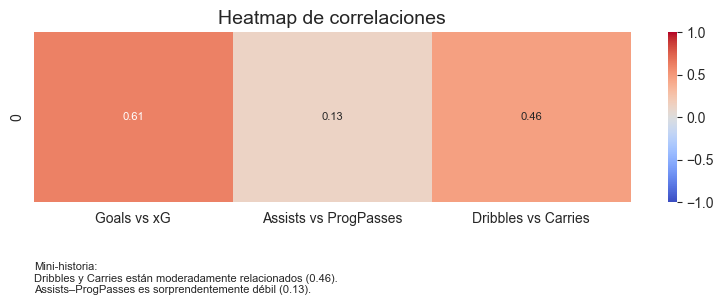

In [2]:
datos = pd.read_csv("premier_limpio.csv")
viz = Visualizador(datos)

viz.scatter()
viz.histograma()
viz.correlaciones()
viz.heatmap()
